## Install Libraries

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import h5py

In [2]:
pip install pyyaml h5py 

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [13]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf


In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import numpy as np
from keras.models import load_model
import cv2
from keras.preprocessing import image
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from time import sleep


## Visualize Data 

In [15]:
picture_size=48

In [16]:
folder_path = "D:/Project_Major/fer dataset/"

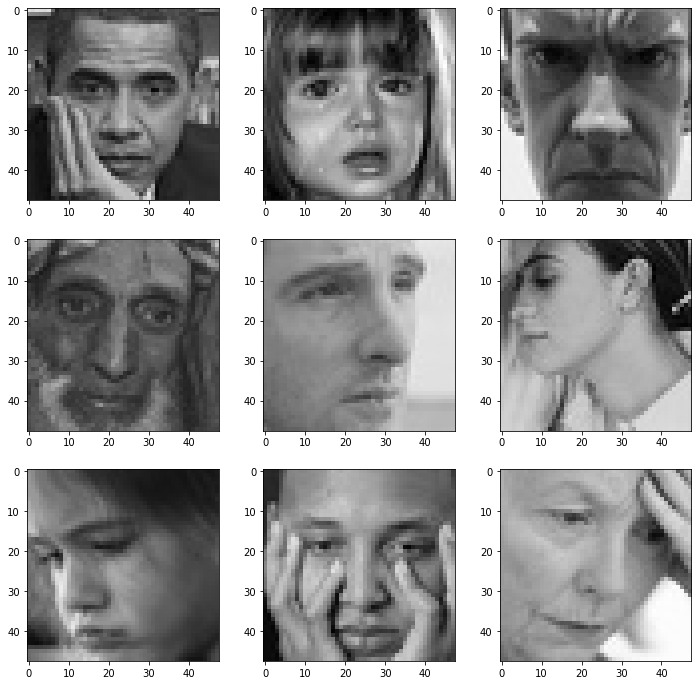

In [17]:
expression = 'sad'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

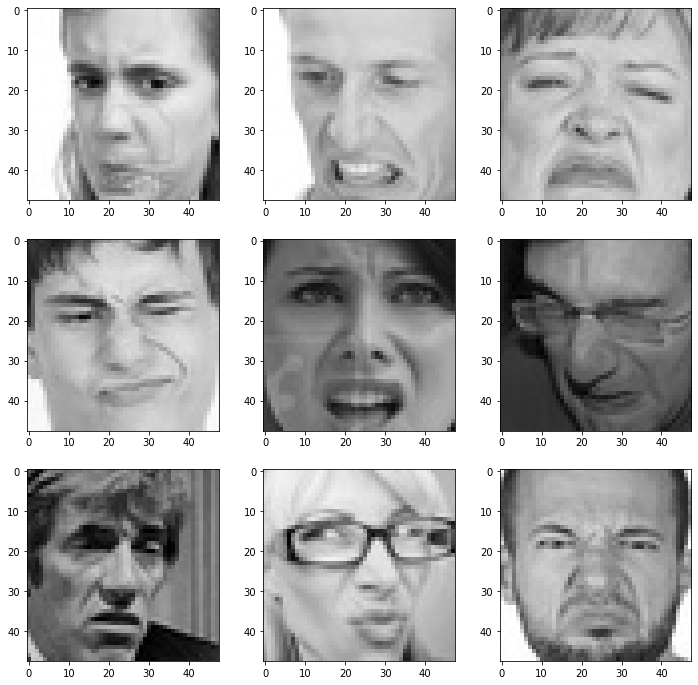

In [18]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

## Load Data

In [7]:
batch_size=64
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)


test_set=datagen_val.flow_from_directory(folder_path+"test",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [19]:
def baseline_model(no_of_classes):

    model=Sequential()

    #1st CNN layer
    model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Dense(no_of_classes,activation="softmax"))

    opt = Adam(lr = 0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model


In [20]:
def model(no_of_classes):

    model=Sequential()

    #1st CNN layer
    model.add(Conv2D(64,(3,3),padding="same",input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    #2nd CNN layer
    model.add(Conv2D(128,(5,5),padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    #3rd CNN layer
    model.add(Conv2D(512,(3,3),padding="same"))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    #4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Fully connected 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    # Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(no_of_classes,activation="softmax"))

    opt = Adam(lr = 0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model

model = model(7)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

C:\Users\dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
base=baseline_model(7)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 dense_4 (Dense)             (None, 24, 24, 7)        

In [18]:
epochs=30

In [19]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                )

Epoch 1/30


C:\Users\dell\AppData\Local\Temp/ipykernel_21988/1111372253.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


448/448 [==============================] - 583s 1s/step - loss: 1.7991 - accuracy: 0.3065 - val_loss: 1.6846 - val_accuracy: 0.3393
Epoch 2/30
448/448 [==============================] - 570s 1s/step - loss: 1.6869 - accuracy: 0.3511 - val_loss: 1.5513 - val_accuracy: 0.4169
Epoch 3/30
448/448 [==============================] - 682s 2s/step - loss: 1.5926 - accuracy: 0.3882 - val_loss: 1.4773 - val_accuracy: 0.4283
Epoch 4/30
448/448 [==============================] - 742s 2s/step - loss: 1.5201 - accuracy: 0.4174 - val_loss: 1.4654 - val_accuracy: 0.4309
Epoch 5/30
448/448 [==============================] - 591s 1s/step - loss: 1.4542 - accuracy: 0.4421 - val_loss: 1.4316 - val_accuracy: 0.4474
Epoch 6/30
448/448 [==============================] - 591s 1s/step - loss: 1.3874 - accuracy: 0.4708 - val_loss: 1.4322 - val_accuracy: 0.4587
Epoch 7/30
448/448 [==============================] - 705s 2s/step - loss: 1.3457 - accuracy: 0.4852 - val_loss: 1.2628 - val_accuracy: 0.5144
Epoch 8/30

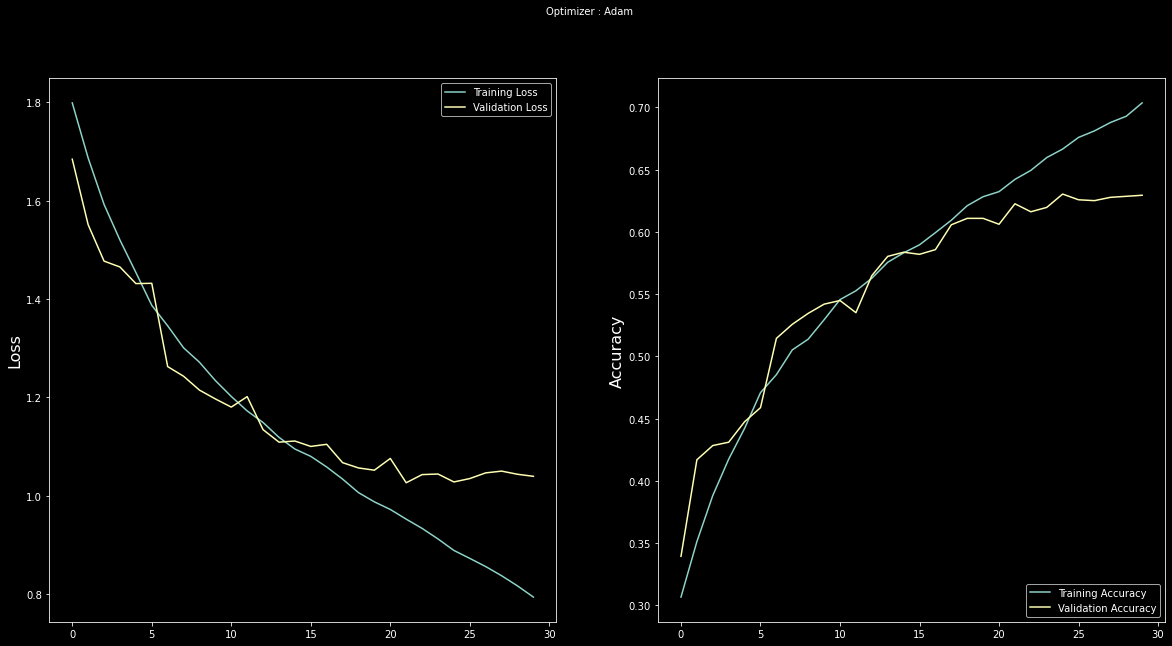

In [20]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [12]:
model.summary()

AttributeError: 'function' object has no attribute 'summary'

In [11]:
model.save("my_model_70.h5")

AttributeError: 'function' object has no attribute 'save'